In [74]:
import pandas as pd
import numpy as np

#### 1. Merge the datasets Customers, Product Hierarchy and Transactions as Customer_Final. Ensure to keep all customers who have done transactions with us and select the join type accordingly.

In [75]:
Cust = pd.read_csv('Customer.csv')

In [76]:
Prod = pd.read_csv('prod_cat_info.csv')

In [77]:
Trans = pd.read_csv('Transactions.csv')

In [81]:
df = pd.merge(left= Cust, right = Trans, left_on = 'customer_Id', right_on ='cust_id', how= 'left', indicator=True )

In [83]:
df = df.loc[:,['customer_Id', 'DOB', 'Gender', 'city_code', 'transaction_id','tran_date', 'prod_subcat_code', 'prod_cat_code', 'Qty', 'Rate', 'Tax', 'total_amt', 'Store_type']]

In [85]:
df = pd.merge(left= df, right = Prod, left_on = ['prod_subcat_code','prod_cat_code'], right_on =['prod_sub_cat_code','prod_cat_code'], how= 'left', indicator=False )

In [86]:
df['DOB'] = pd.to_datetime(df['DOB'], format = '%d-%m-%Y')

In [87]:
df['tran_date'] = pd.to_datetime(df['tran_date'], format = '%m/%d/%Y')

#### 2. Prepare a summary report for the merged data set.

##### a.Get the column names and their corresponding data types

In [88]:
df.dtypes

customer_Id                   int64
DOB                  datetime64[ns]
Gender                       object
city_code                   float64
transaction_id              float64
tran_date            datetime64[ns]
prod_subcat_code            float64
prod_cat_code               float64
Qty                         float64
Rate                        float64
Tax                         float64
total_amt                   float64
Store_type                   object
prod_cat                     object
prod_sub_cat_code           float64
prod_subcat                  object
dtype: object

##### b.Top/Bottom 10 observations

In [89]:
df.head(10)

,customer_Id,DOB,Gender,city_code,transaction_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_sub_cat_code,prod_subcat
0,268408,1970-01-02,M,4.0,8.724384e+10,2014-01-13,7.0,5.0,5.0,187.0,98.175,1033.175,TeleShop,Books,7.0,Fiction
1,268408,1970-01-02,M,4.0,1.619787e+10,2013-12-16,1.0,4.0,-5.0,-210.0,110.250,-1160.250,Flagship store,Bags,1.0,Mens
2,268408,1970-01-02,M,4.0,1.619787e+10,2013-12-12,1.0,4.0,5.0,210.0,110.250,1160.250,Flagship store,Bags,1.0,Mens
3,268408,1970-01-02,M,4.0,2.881014e+10,2013-09-02,10.0,6.0,2.0,813.0,170.730,1796.730,TeleShop,Home and kitchen,10.0,Kitchen
4,268408,1970-01-02,M,4.0,6.463344e+10,2013-05-06,4.0,2.0,3.0,312.0,98.280,1034.280,Flagship store,Footwear,4.0,Kids
5,268408,1970-01-02,M,4.0,5.690286e+10,2013-01-30,9.0,3.0,5.0,868.0,455.700,4795.700,e-Shop,Electronics,9.0,Cameras
6,268408,1970-01-02,M,4.0,5.684453e+10,2012-10-14,1.0,2.0,5.0,1175.0,616.875,6491.875,MBR,Footwear,1.0,Mens
7,268408,1970-01-02,M,4.0,1.951606e+10,2012-09-07,10.0,3.0,4.0,650.0,273.000,2873.000,e-Shop,Electronics,10.0,Audio and video
8,268408,1970-01-02,M,4.0,1.264450e+10,2012-08-14,4.0,4.0,3.0,321.0,101.115,1064.115,TeleShop,Bags,4.0,Women
9,268408,1970-01-02,M,4.0,6.331455e+10,2012-04-26,1.0,1.0,1.0,806.0,84.630,890.630,Flagship store,Clothing,1.0,Women


In [90]:
df.tail(10)

,customer_Id,DOB,Gender,city_code,transaction_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_sub_cat_code,prod_subcat
23184,270476,1992-12-25,F,3.0,7.803441e+10,2013-08-13,11.0,6.0,1.0,971.0,101.955,1072.955,TeleShop,Home and kitchen,11.0,Bath
23185,270476,1992-12-25,F,3.0,3.359888e+09,2013-03-16,10.0,3.0,4.0,361.0,151.620,1595.620,MBR,Electronics,10.0,Audio and video
23186,270476,1992-12-25,F,3.0,2.288339e+10,2012-05-22,4.0,2.0,4.0,898.0,377.160,3969.160,Flagship store,Footwear,4.0,Kids
23187,270476,1992-12-25,F,3.0,1.972519e+10,2012-02-21,4.0,4.0,4.0,618.0,259.560,2731.560,e-Shop,Bags,4.0,Women
23188,270476,1992-12-25,F,3.0,8.547516e+10,2011-08-09,5.0,3.0,5.0,1354.0,710.850,7480.850,Flagship store,Electronics,5.0,Computers
23189,269626,1992-12-27,F,5.0,7.136903e+10,2011-10-18,12.0,6.0,1.0,638.0,66.990,704.990,e-Shop,Home and kitchen,12.0,Tools
23190,269626,1992-12-27,F,5.0,9.413405e+10,2011-07-07,3.0,1.0,3.0,1078.0,339.570,3573.570,MBR,Clothing,3.0,Kids
23191,274308,1992-12-29,F,5.0,2.620869e+10,2012-10-22,1.0,2.0,2.0,898.0,188.580,1984.580,MBR,Footwear,1.0,Mens
23192,274308,1992-12-29,F,5.0,5.735882e+10,2012-09-05,1.0,2.0,4.0,876.0,367.920,3871.920,e-Shop,Footwear,1.0,Mens
23193,274308,1992-12-29,F,5.0,5.816054e+10,2012-07-04,12.0,5.0,5.0,588.0,308.700,3248.700,e-Shop,Books,12.0,Academic


##### c.“Five-number summary” for continuous variables (min, Q1, median, Q3 and max)

In [91]:
df.describe()

,customer_Id,city_code,transaction_id,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,prod_sub_cat_code
count,23194.000000,23186.000000,2.305300e+04,23053.000000,23053.000000,23053.000000,23053.000000,23053.000000,23053.000000,23053.000000
mean,271022.609296,5.480204,5.007348e+10,6.149091,3.763632,2.432395,636.369713,248.667192,2107.308002,6.149091
std,2431.350129,2.863884,2.898194e+10,3.726372,1.677016,2.268406,622.363498,187.177773,2507.561264,3.726372
min,266783.000000,1.000000,3.268991e+06,1.000000,1.000000,-5.000000,-1499.000000,7.350000,-8270.925000,1.000000
25%,268936.000000,3.000000,2.493864e+10,3.000000,2.000000,1.000000,312.000000,98.280000,762.450000,3.000000
50%,270981.000000,5.000000,5.009313e+10,5.000000,4.000000,3.000000,710.000000,199.080000,1754.740000,5.000000
75%,273115.750000,8.000000,7.533000e+10,10.000000,5.000000,4.000000,1109.000000,365.715000,3569.150000,10.000000
max,275265.000000,10.000000,9.998755e+10,12.000000,6.000000,5.000000,1500.000000,787.500000,8287.500000,12.000000


##### d.Frequency tables for all the categorical variables


In [92]:
df.dtypes

customer_Id                   int64
DOB                  datetime64[ns]
Gender                       object
city_code                   float64
transaction_id              float64
tran_date            datetime64[ns]
prod_subcat_code            float64
prod_cat_code               float64
Qty                         float64
Rate                        float64
Tax                         float64
total_amt                   float64
Store_type                   object
prod_cat                     object
prod_sub_cat_code           float64
prod_subcat                  object
dtype: object

In [93]:
df['Gender'].value_counts()

M    11877
F    11308
Name: Gender, dtype: int64

In [94]:
df['Store_type'].value_counts()

e-Shop            9311
MBR               4661
Flagship store    4577
TeleShop          4504
Name: Store_type, dtype: int64

In [95]:
df['city_code'].value_counts()

4.0     2435
3.0     2430
5.0     2376
7.0     2368
10.0    2345
8.0     2341
2.0     2288
1.0     2274
9.0     2192
6.0     2137
Name: city_code, dtype: int64

In [96]:
df['prod_subcat_code'].value_counts()

4.0     4002
3.0     3067
10.0    2993
1.0     2950
11.0    2058
12.0    2029
7.0     1043
2.0     1007
6.0      989
9.0      985
8.0      972
5.0      958
Name: prod_subcat_code, dtype: int64

In [97]:
df['prod_cat_code'].value_counts()

5.0    6069
3.0    4898
6.0    4129
2.0    2999
1.0    2960
4.0    1998
Name: prod_cat_code, dtype: int64

In [98]:
df['prod_cat'].value_counts()

Books               6069
Electronics         4898
Home and kitchen    4129
Footwear            2999
Clothing            2960
Bags                1998
Name: prod_cat, dtype: int64

In [99]:
df['prod_sub_cat_code'].value_counts()

4.0     4002
3.0     3067
10.0    2993
1.0     2950
11.0    2058
12.0    2029
7.0     1043
2.0     1007
6.0      989
9.0      985
8.0      972
5.0      958
Name: prod_sub_cat_code, dtype: int64

In [100]:
df['prod_subcat'].value_counts()

Women                  3048
Mens                   2912
Kids                   1997
Tools                  1062
Fiction                1043
Kitchen                1037
Children               1035
Comics                 1031
Mobiles                1031
Bath                   1023
Furnishing             1007
Non-Fiction            1004
DIY                     989
Cameras                 985
Personal Appliances     972
Academic                967
Computers               958
Audio and video         952
Name: prod_subcat, dtype: int64

#### 3. Generate histograms for all continuous variables and frequency bars for categorical variables.


In [125]:
dict(df.dtypes)

{'customer_Id': dtype('int64'),
 'DOB': dtype('<M8[ns]'),
 'Gender': dtype('O'),
 'city_code': dtype('float64'),
 'transaction_id': dtype('float64'),
 'tran_date': dtype('<M8[ns]'),
 'prod_subcat_code': dtype('float64'),
 'prod_cat_code': dtype('float64'),
 'Qty': dtype('float64'),
 'Rate': dtype('float64'),
 'Tax': dtype('float64'),
 'total_amt': dtype('float64'),
 'Store_type': dtype('O'),
 'prod_cat': dtype('O'),
 'prod_sub_cat_code': dtype('float64'),
 'prod_subcat': dtype('O'),
 'age': dtype('int64')}

In [126]:
numeric_var_names=[key for key in dict(df.dtypes) if dict(df.dtypes)[key] in ['float64', 'int64', 'float32', 'int32']]
cat_var_names=[key for key in dict(df.dtypes) if dict(df.dtypes)[key] in ['object']]

In [127]:
df_cat = df[cat_var_names]

df_num = df[numeric_var_names]

In [130]:
df_cat

,Gender,Store_type,prod_cat,prod_subcat
0,M,TeleShop,Books,Fiction
1,M,Flagship store,Bags,Mens
2,M,Flagship store,Bags,Mens
3,M,TeleShop,Home and kitchen,Kitchen
4,M,Flagship store,Footwear,Kids
...,...,...,...,...
23189,F,e-Shop,Home and kitchen,Tools
23190,F,MBR,Clothing,Kids
23191,F,MBR,Footwear,Mens
23192,F,e-Shop,Footwear,Mens


##### Frequency Bars

In [149]:
import matplotlib
import seaborn as sns

In [144]:
from matplotlib import pyplot as plt

In [145]:
%matplotlib inline

In [134]:
df_cat.columns

Index(['Gender', 'Store_type', 'prod_cat', 'prod_subcat'], dtype='object')

In [135]:
df_Gender = df_cat.groupby(by= 'Gender')[['Gender']].count().add_prefix('Count of ').reset_index()

In [139]:
df_Gender

,Gender,Count of Gender
0,F,11308
1,M,11877


<AxesSubplot:xlabel='Gender', ylabel='Count of Gender'>

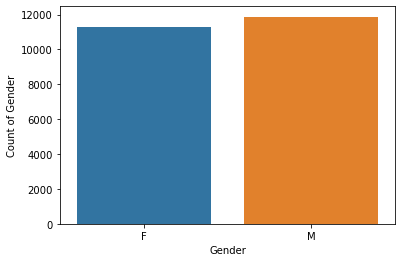

In [150]:
sns.barplot(data = df_Gender, x = 'Gender', y = 'Count of Gender')

In [151]:
df_Store = df_cat.groupby(by= 'Store_type')[['Store_type']].count().add_prefix('Count of ').reset_index()

<AxesSubplot:xlabel='Store_type', ylabel='Count of Store_type'>

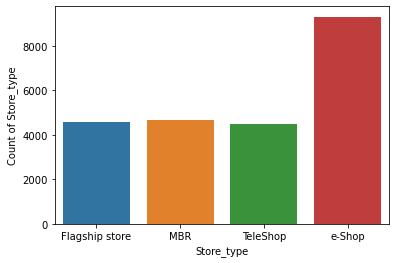

In [152]:
sns.barplot(data = df_Store, x = 'Store_type', y = 'Count of Store_type')

In [153]:
df_prod_cat = df_cat.groupby(by= 'prod_cat')[['prod_cat']].count().add_prefix('Count of ').reset_index()

<AxesSubplot:xlabel='prod_cat', ylabel='Count of prod_cat'>

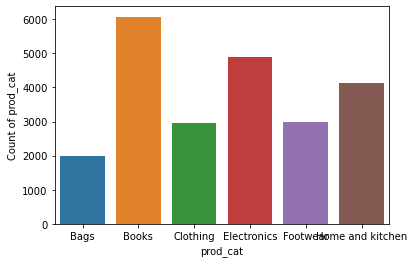

In [155]:
sns.barplot(data = df_prod_cat, x = 'prod_cat', y = 'Count of prod_cat')

In [156]:
df_prod_subcat = df_cat.groupby(by= 'prod_subcat')[['prod_subcat']].count().add_prefix('Count of ').reset_index()

<AxesSubplot:xlabel='prod_subcat', ylabel='Count of prod_subcat'>

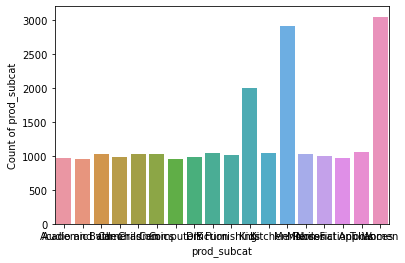

In [157]:
sns.barplot(data = df_prod_subcat, x = 'prod_subcat', y = 'Count of prod_subcat')

##### Histograms

In [159]:
df_num.columns

Index(['customer_Id', 'city_code', 'transaction_id', 'prod_subcat_code',
       'prod_cat_code', 'Qty', 'Rate', 'Tax', 'total_amt', 'prod_sub_cat_code',
       'age'],
      dtype='object')

In [160]:
TQ = df.Qty

<AxesSubplot:ylabel='Frequency'>

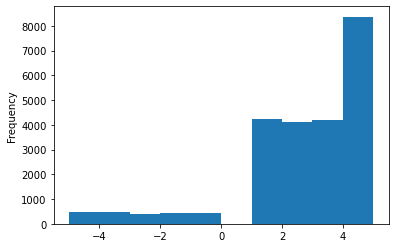

In [161]:
TQ.plot(kind= 'hist')

In [163]:
TR = df.Rate

<AxesSubplot:ylabel='Frequency'>

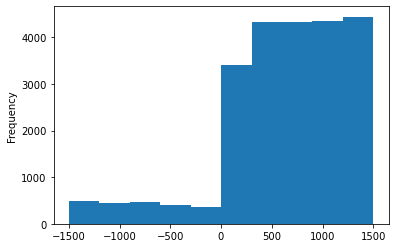

In [164]:
TR.plot(kind= 'hist')

In [172]:
TT = df.Tax

<AxesSubplot:ylabel='Frequency'>

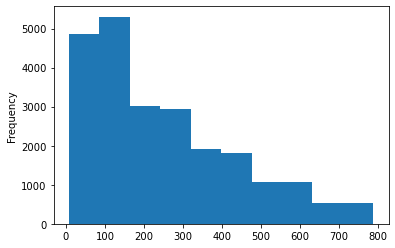

In [173]:
TT.plot(kind= 'hist')

In [174]:
TA = df.total_amt

<AxesSubplot:ylabel='Frequency'>

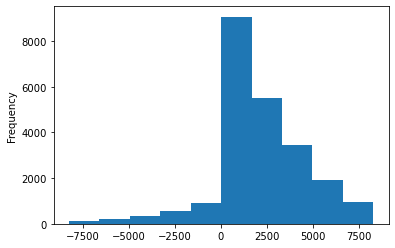

In [175]:
TA.plot(kind= 'hist')

#### 4. Calculate the following information using the merged dataset :

##### b.Count of transactions where the total amount of transaction was negative

In [101]:
(df.total_amt<0).sum()

2177

##### 5.Analyze which product categories are more popular among females vs male customers.


In [102]:
df.groupby(by = ['Gender','prod_cat'])[['Gender']].count().add_prefix('Count of ').reset_index()


,Gender,prod_cat,Count of Gender
0,F,Bags,994
1,F,Books,2949
2,F,Clothing,1439
3,F,Electronics,2328
4,F,Footwear,1529
5,F,Home and kitchen,1994
6,M,Bags,1004
7,M,Books,3116
8,M,Clothing,1518
9,M,Electronics,2570


##### Books are more popular in Females whereas Electronics items are more popular in Males

##### 6. Which City code has the maximum customers and what was the percentage of customers from that city?


In [103]:
df_city_customercount = df.groupby(by = 'city_code')[['customer_Id']].count().add_prefix('Count of ').reset_index()

In [104]:
df_city_customercount['Percentage'] = (df_city_customercount['Count of customer_Id']/df_city_customercount['Count of customer_Id'].sum())*100

In [105]:
df_city_customercount

,city_code,Count of customer_Id,Percentage
0,1.0,2274,9.807643
1,2.0,2288,9.868024
2,3.0,2430,10.480462
3,4.0,2435,10.502027
4,5.0,2376,10.247563
5,6.0,2137,9.216769
6,7.0,2368,10.213060
7,8.0,2341,10.096610
8,9.0,2192,9.453981
9,10.0,2345,10.113862


In [106]:
print('City 4 has maximum customers and percentage of customer from that city:', df_city_customercount.Percentage.max())

City 4 has maximum customers and percentage of customer from that city: 10.5020270853101


##### 7. Which store type sells the maximum products by value and by quantity?


In [171]:
df.groupby(by = ['Store_type','prod_cat'])[['Qty','total_amt']].max().reset_index()

,Store_type,prod_cat,Qty,total_amt
0,Flagship store,Bags,5.0,8215.675
1,Flagship store,Books,5.0,8254.350
2,Flagship store,Clothing,5.0,8248.825
3,Flagship store,Electronics,5.0,8165.950
4,Flagship store,Footwear,5.0,8116.225
5,Flagship store,Home and kitchen,5.0,8188.050
6,MBR,Bags,5.0,8281.975
7,MBR,Books,5.0,8276.450
8,MBR,Clothing,5.0,8160.425
9,MBR,Electronics,5.0,8287.500


##### 8. What was the total amount earned from the "Electronics" and "Clothing" categories from Flagship Stores?

In [178]:
df_flag = df.loc[(df.prod_cat=='Electronics') | (df.prod_cat=='Clothing') & (df.Store_type == 'Flagship store')]

In [179]:
print('Total amount earned from the "Electronics" and "Clothing" categories from Flagship Stores:',df_flag.total_amt.sum())

Total amount earned from the "Electronics" and "Clothing" categories from Flagship Stores: 11916886.865


##### 9. What was the total amount earned from "Male" customers under the "Electronics" category?


In [165]:
df_Male = df.loc[(df.prod_cat=='Electronics')& (df.Gender == 'M')]

In [110]:
print('Total amount earned from "Male" customers under the "Electronics" category:',df_Male.total_amt.sum())

Total amount earned from "Male" customers under the "Electronics" category: 5703109.425


##### 10. How many customers have more than 10 unique transactions, after removing all transactions which have any negative amounts?

In [111]:
df_trans = df.loc[(df.total_amt>0)]

In [112]:
df_trans = df_trans.loc[-df_trans.duplicated()]

In [113]:
print('Customers have more than 10 unique transactions, after removing all transactions which have any negative amounts:',
      df_trans['customer_Id'].value_counts()[df_trans['customer_Id'].value_counts()>10].count())

Customers have more than 10 unique transactions, after removing all transactions which have any negative amounts: 6


#### For all customers aged between 25 - 35, find out:


In [114]:
current_date = pd.to_datetime('today')

In [115]:
df['age'] = current_date.year - pd.DatetimeIndex(df['DOB']).year

In [116]:
df_age = df.loc[(df.age >=25) & (df.age <=35)]

In [117]:
df_age.head(5)

,customer_Id,DOB,Gender,city_code,transaction_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_sub_cat_code,prod_subcat,age
15004,272462,1985-01-02,F,8.0,1.897231e+10,2014-01-01,9.0,3.0,2.0,1014.0,212.940,2240.940,MBR,Electronics,9.0,Cameras,35
15005,273317,1985-01-04,M,3.0,6.256997e+10,2012-10-10,1.0,2.0,3.0,680.0,214.200,2254.200,MBR,Footwear,1.0,Mens,35
15006,273317,1985-01-04,M,3.0,1.952788e+10,2012-05-17,5.0,3.0,1.0,257.0,26.985,283.985,Flagship store,Electronics,5.0,Computers,35
15007,273317,1985-01-04,M,3.0,1.662825e+10,2012-04-04,10.0,5.0,2.0,837.0,175.770,1849.770,e-Shop,Books,10.0,Non-Fiction,35
15008,273317,1985-01-04,M,3.0,3.226707e+10,2011-11-06,2.0,6.0,4.0,1013.0,425.460,4477.460,e-Shop,Home and kitchen,2.0,Furnishing,35


##### a. What was the total amount spent for “Electronics” and “Books” product categories?


In [118]:
df_age_elect_books = df_age.loc[(df_age.prod_cat == 'Electronics') | (df_age.prod_cat == 'Books')]

In [119]:
df_age_elect_books.head(5)

,customer_Id,DOB,Gender,city_code,transaction_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_sub_cat_code,prod_subcat,age
15004,272462,1985-01-02,F,8.0,1.897231e+10,2014-01-01,9.0,3.0,2.0,1014.0,212.940,2240.940,MBR,Electronics,9.0,Cameras,35
15006,273317,1985-01-04,M,3.0,1.952788e+10,2012-05-17,5.0,3.0,1.0,257.0,26.985,283.985,Flagship store,Electronics,5.0,Computers,35
15007,273317,1985-01-04,M,3.0,1.662825e+10,2012-04-04,10.0,5.0,2.0,837.0,175.770,1849.770,e-Shop,Books,10.0,Non-Fiction,35
15009,273317,1985-01-04,M,3.0,6.048583e+10,2011-11-05,5.0,3.0,2.0,272.0,57.120,601.120,Flagship store,Electronics,5.0,Computers,35
15010,273686,1985-01-06,F,10.0,2.084250e+10,2013-09-13,10.0,5.0,3.0,300.0,94.500,994.500,MBR,Books,10.0,Non-Fiction,35


In [120]:
print('Total amount spent for “Electronics” and “Books” product categories:',df_age_elect_books.total_amt.sum())

Total amount spent for “Electronics” and “Books” product categories: 8162276.9799999995


##### b. What was the total amount spent by these customers between 1st Jan, 2014 to 1st Mar, 2014?


In [121]:
df_age_elect_books = df_age_elect_books.loc[(df_age_elect_books.tran_date >='2014-01-01') & (df_age_elect_books.tran_date<='2014-03-01')]

In [73]:
print('Total amount spent by these customers between 1st Jan, 2014 to 1st Mar, 2014:',df_age_elect_books.total_amt.sum())

Total amount spent by these customers between 1st Jan, 2014 to 1st Mar, 2014: 366454.46499999997


In [122]:
pd.Period(df.tran_date)

ValueError: Value must be Period, string, integer, or datetime

In [123]:
df.dtypes

customer_Id                   int64
DOB                  datetime64[ns]
Gender                       object
city_code                   float64
transaction_id              float64
tran_date            datetime64[ns]
prod_subcat_code            float64
prod_cat_code               float64
Qty                         float64
Rate                        float64
Tax                         float64
total_amt                   float64
Store_type                   object
prod_cat                     object
prod_sub_cat_code           float64
prod_subcat                  object
age                           int64
dtype: object